# Analysis of Obstacle Environment Training Results
This notebook analyzes the training performance of the PPO agent in the Grid World environment with obstacles. It visualizes the learning curves for reward and episode length based on data from multiple training runs.


### 1. Import Necessary Libraries
We import the libraries needed for data loading, file searching, and plotting.


In [12]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Find and Load Data from CSV Files
We search for all `progress.csv` files in directories matching the pattern `log/ppo_obstacles_20_40_*` and combine them into a single DataFrame.


In [13]:
# Find all progress.csv files
path_pattern = 'log/ppo_obstacles_20_40_*/progress.csv'
csv_files = glob.glob(path_pattern)

# Read and concatenate all CSV files into a single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
all_data = pd.concat(df_list, ignore_index=True)

print(f"Found and loaded {len(df_list)} files.")
print("Data head:")
print(all_data.head())


Found and loaded 13 files.
Data head:
   time/fps  rollout/ep_len_mean  time/time_elapsed  time/total_timesteps  \
0      1311           393.000000                  1                  2048   
1      1029           280.153846                  3                  4096   
2       955           195.741935                  6                  6144   
3       923           160.680000                  8                  8192   
4       894           122.783133                 11                 10240   

   rollout/ep_rew_mean  time/iterations  train/value_loss  train/clip_range  \
0           -84.008939                1               NaN               NaN   
1           -51.865220                2          7.918208               0.2   
2           -29.523715                3         12.277969               0.2   
3           -19.420314                4         19.483862               0.2   
4            -9.867487                5         17.740840               0.2   

   train/policy_gradient

### 3. Plot Time Steps vs. Mean Reward
This plot shows the `rollout/ep_rew_mean` against `time/total_timesteps`. Seaborn's `lineplot` automatically aggregates the data to show the mean trend and a confidence interval representing the variance across runs.


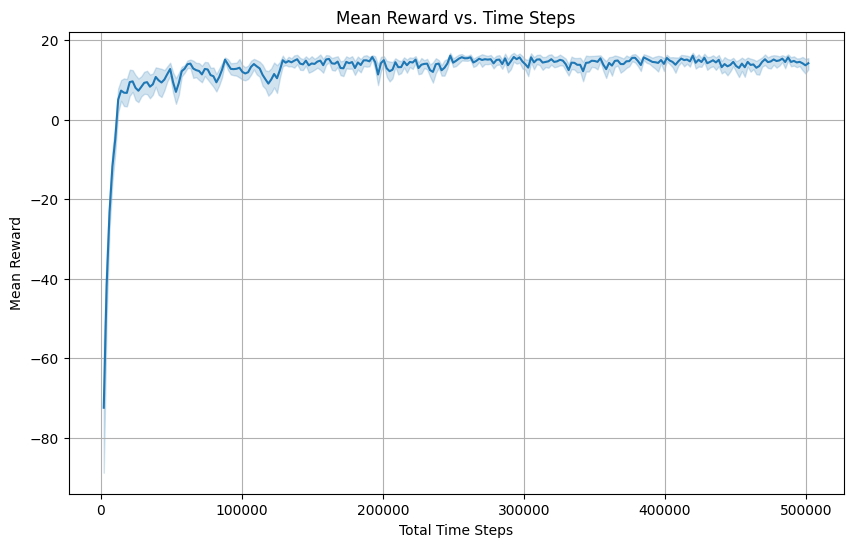

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_rew_mean')
plt.title('Mean Reward vs. Time Steps')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.show()


### 4. Plot Time Steps vs. Mean Episode Length
This plot shows the `rollout/ep_len_mean` against `time/total_timesteps`, illustrating how the average episode length changes as the agent learns.


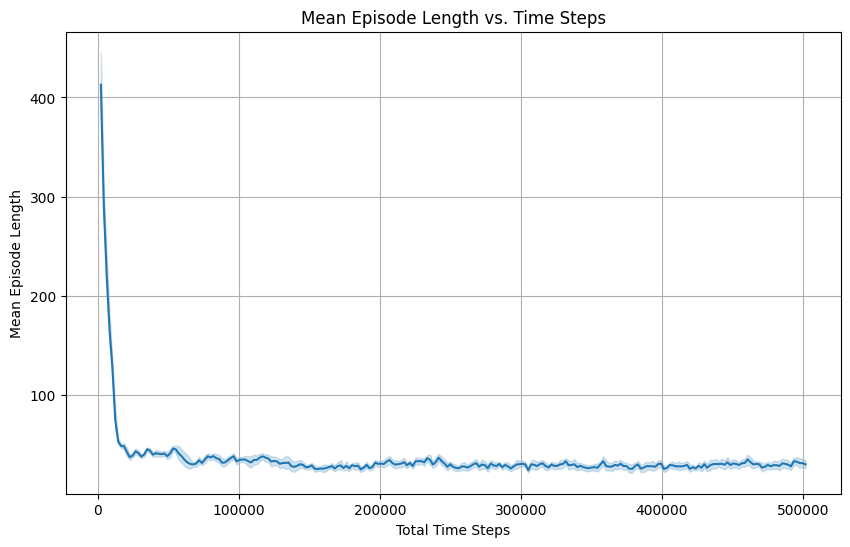

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_len_mean')
plt.title('Mean Episode Length vs. Time Steps')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Episode Length')
plt.grid(True)
plt.show()


### 5. Analysis of Training with New Reward Function (v2)
Now we'll analyze the training results using the new reward function implementation. We'll compare the learning curves for both reward and episode length.

In [ ]:
# Find all progress.csv files for the new training versions (v2, v3, and v4)
path_pattern_v2 = 'log/ppo_obstacles_20_40_500_*_v2/progress.csv'
path_pattern_v3 = 'log/ppo_obstacles_20_40_500_*_v3/progress.csv'
path_pattern_v4 = 'log/ppo_obstacles_20_40_500_*_v4/progress.csv'

csv_files_v2 = glob.glob(path_pattern_v2)
csv_files_v3 = glob.glob(path_pattern_v3)
csv_files_v4 = glob.glob(path_pattern_v4)

# Read and concatenate CSV files for each version
df_list_v2 = [pd.read_csv(file) for file in csv_files_v2]
df_list_v3 = [pd.read_csv(file) for file in csv_files_v3]
df_list_v4 = [pd.read_csv(file) for file in csv_files_v4]

data_v2 = pd.concat(df_list_v2, ignore_index=True)
data_v3 = pd.concat(df_list_v3, ignore_index=True)
data_v4 = pd.concat(df_list_v4, ignore_index=True)

print(f"Found and loaded {len(df_list_v2)} files for v2 reward function.")
print(f"Found and loaded {len(df_list_v3)} files for v3 reward function.")
print(f"Found and loaded {len(df_list_v4)} files for v4 reward function.")

Found and loaded 5 files for v2 reward function.
Found and loaded 3 files for v3 reward function.


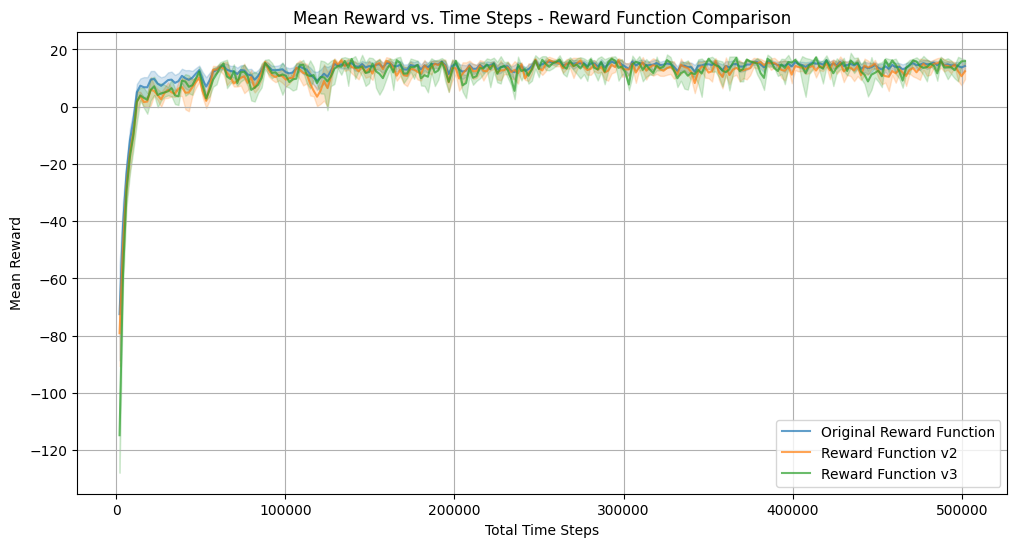

In [ ]:
# Plot comparison of mean rewards
plt.figure(figsize=(12, 6))

# Original reward function data
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_rew_mean', 
             label='Original Reward Function', alpha=0.7)

# V2 reward function data
sns.lineplot(data=data_v2, x='time/total_timesteps', y='rollout/ep_rew_mean', 
             label='Reward Function v2', alpha=0.7)

# V3 reward function data
sns.lineplot(data=data_v3, x='time/total_timesteps', y='rollout/ep_rew_mean', 
             label='Reward Function v3', alpha=0.7)

# V4 reward function data
sns.lineplot(data=data_v4, x='time/total_timesteps', y='rollout/ep_rew_mean', 
             label='Reward Function v4', alpha=0.7)

plt.title('Mean Reward vs. Time Steps - Reward Function Comparison')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Reward')
plt.grid(True)
plt.legend()
plt.show()

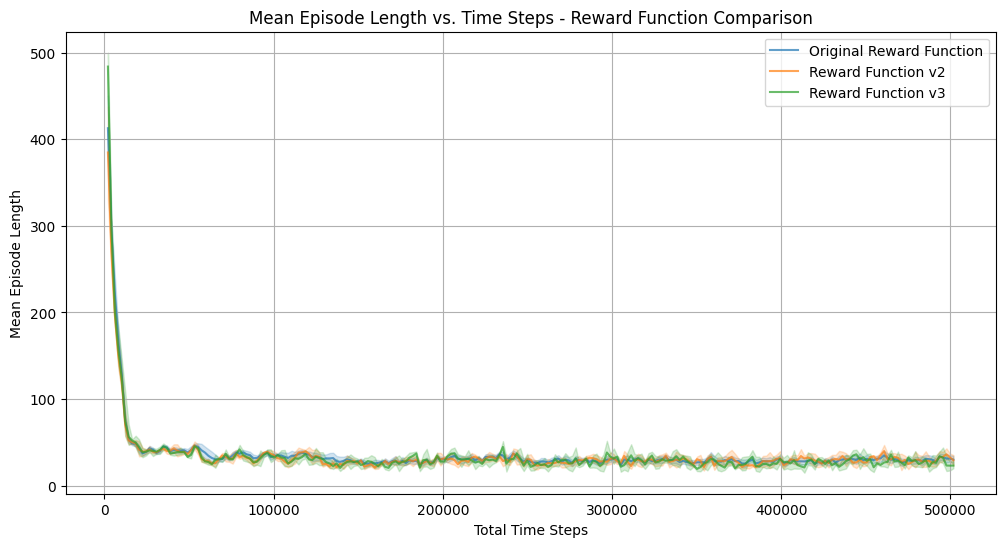

In [ ]:
# Plot comparison of mean episode lengths
plt.figure(figsize=(12, 6))

# Original reward function data
sns.lineplot(data=all_data, x='time/total_timesteps', y='rollout/ep_len_mean', 
             label='Original Reward Function', alpha=0.7)

# V2 reward function data
sns.lineplot(data=data_v2, x='time/total_timesteps', y='rollout/ep_len_mean', 
             label='Reward Function v2', alpha=0.7)

# V3 reward function data
sns.lineplot(data=data_v3, x='time/total_timesteps', y='rollout/ep_len_mean', 
             label='Reward Function v3', alpha=0.7)

# V4 reward function data
sns.lineplot(data=data_v4, x='time/total_timesteps', y='rollout/ep_len_mean', 
             label='Reward Function v4', alpha=0.7)

plt.title('Mean Episode Length vs. Time Steps - Reward Function Comparison')
plt.xlabel('Total Time Steps')
plt.ylabel('Mean Episode Length')
plt.grid(True)
plt.legend()
plt.show()